# Importações

In [3]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras

# Bibliotecas Auxiliares
import numpy as np
import matplotlib.pyplot as plt

# Montando os datasets

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [55]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_labes = list(range(10))

cloths_dict = {class_labes[i]: class_names[i] for i in range(10)}

# Dando uma olhada nos dados

* As primeiras 25 figuras do conjunto de trinamento

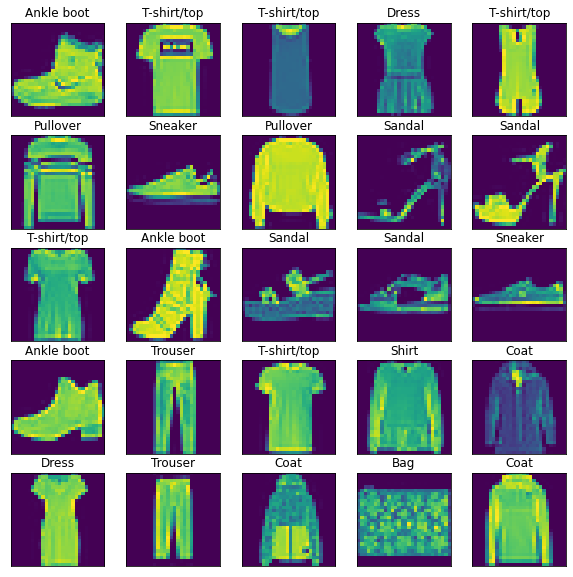

In [92]:
plt.figure(figsize=(10,10))

for i in range(25):
    plt.subplot(5,5,i+1)
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.title(cloths_dict[train_labels[i]])

In [99]:
train_images.shape

(60000, 28, 28)

# Preprocessamento dos dados

In [94]:
max_value = train_images.max()
min_valie = train_images.min()

train_images = train_images / 255.0
test_images = test_images / 255.0

# Criando o Modelo

In [101]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # input layer
    keras.layers.Dense(128, activation='relu'), # hidden layer
    keras.layers.Dense(10, activation='softmax') # output layer
])

In [102]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [103]:
model.fit(train_images, train_labels, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4940 - accuracy: 0.8263
Epoch 2/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3718 - accuracy: 0.8654
Epoch 3/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3378 - accuracy: 0.8761
Epoch 4/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3132 - accuracy: 0.8842
Epoch 5/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2948 - accuracy: 0.8904
Epoch 6/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2800 - accuracy: 0.8968
Epoch 7/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2668 - accuracy: 0.9012
Epoch 8/100
1875/1875 [==============================] - 2s 963us/step - loss: 0.2570 - accuracy: 0.9046
Epoch 9/100
1875/1875 [==============================] - 2s 963us/step - loss: 0.2469 - accuracy: 0.9074
Epoch 10/100
1875/1875 [==============================] - 2s 963us/st

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0694 - accuracy: 0.9744
Epoch 79/100
1875/1875 [==============================] - 2s 931us/step - loss: 0.0669 - accuracy: 0.9757
Epoch 80/100
1875/1875 [==============================] - 2s 955us/step - loss: 0.0635 - accuracy: 0.9765
Epoch 81/100
1875/1875 [==============================] - 2s 893us/step - loss: 0.0655 - accuracy: 0.9751
Epoch 82/100
1875/1875 [==============================] - 2s 920us/step - loss: 0.0661 - accuracy: 0.9756
Epoch 83/100
1875/1875 [==============================] - 2s 892us/step - loss: 0.0653 - accuracy: 0.9756
Epoch 84/100
1875/1875 [==============================] - 2s 883us/step - loss: 0.0624 - accuracy: 0.9769
Epoch 85/100
1875/1875 [==============================] - 2s 923us/step - loss: 0.0610 - accuracy: 0.9771
Epoch 86/100
1875/1875 [==============================] - 2s 925us/step - loss: 0.0644 - accuracy: 0.9760
Epoch 87/100
1875/1875 [==============================] - 2s 

In [108]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

313/313 - 0s - loss: 0.7761 - accuracy: 0.8889


# Verificando os resultados das previsões

In [107]:
predictions = model.predict(test_images)

In [204]:
def check_predict(i, fig_size=(10,5) ):
    
    plt.figure(figsize=fig_size)

    plt.subplot(1,2,1)
    plt.imshow(train_images[i])
    plt.yticks([])
    plt.xticks([])
    plt.grid(False)
    plt.title(cloths_dict[test_labels[i]])

    plt.subplot(1,2,2)
    thisplot = plt.bar(x = class_names,height = predictions[i], color="#777777")
    predicted_label = np.argmax(predictions[i])
    true_label = test_labels[i]
    plt.xticks(rotation=90)
    thisplot[predicted_label].set_color("#E74C3C")
    thisplot[true_label].set_color("#27AE60")

C:\Users\gilva\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


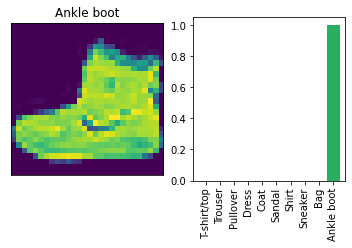

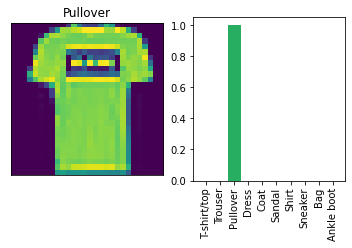

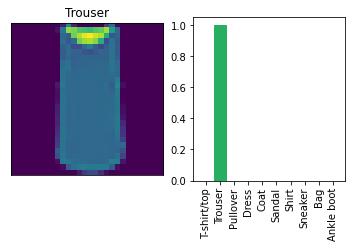

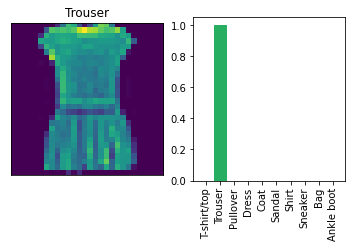

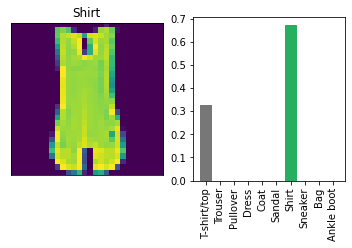

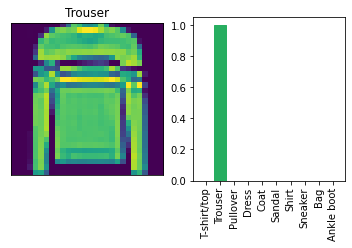

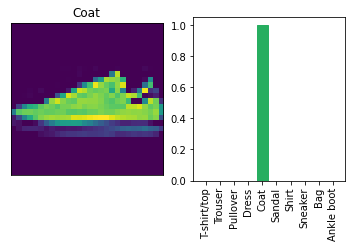

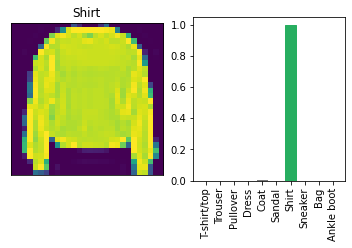

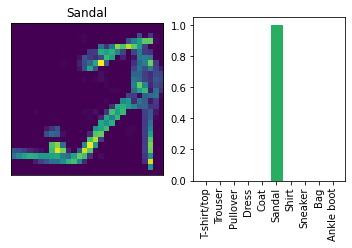

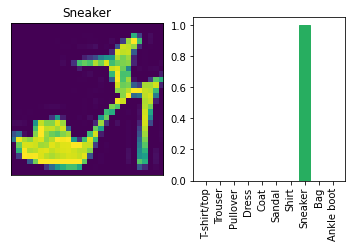

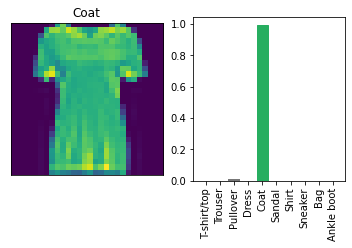

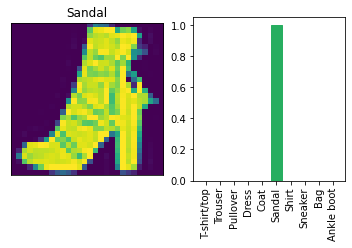

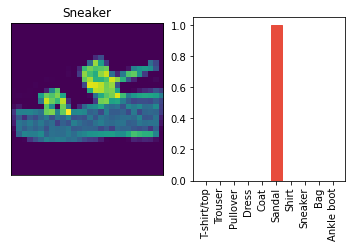

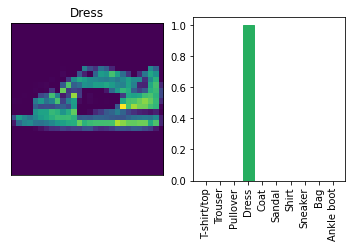

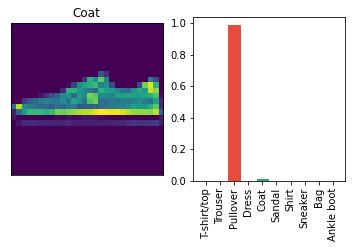

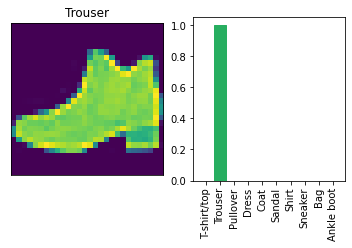

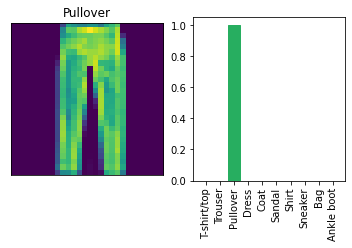

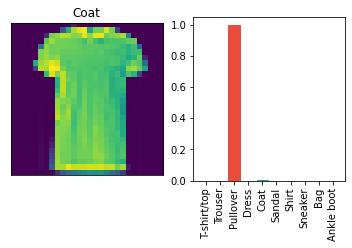

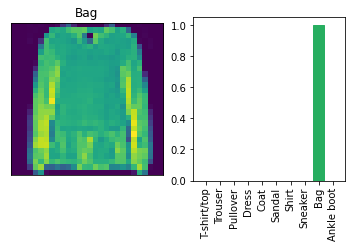

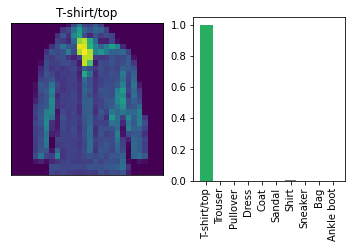

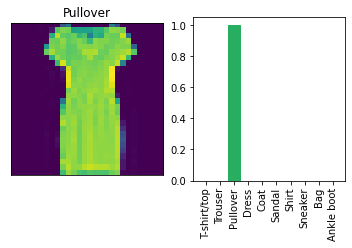

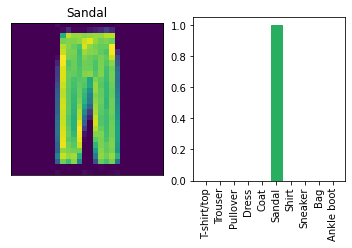

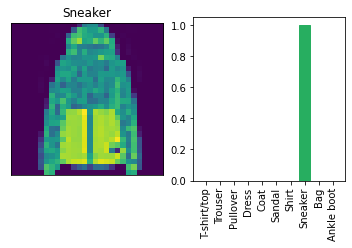

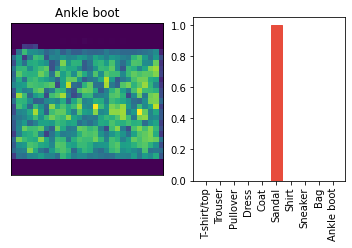

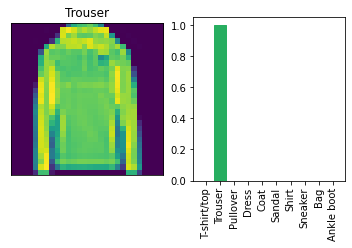

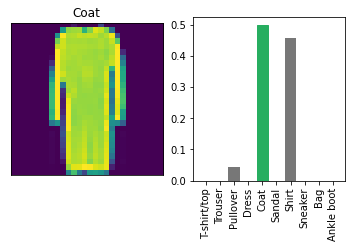

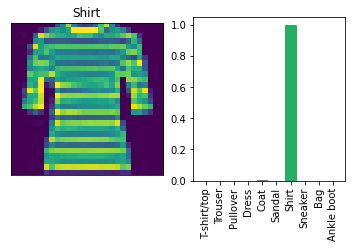

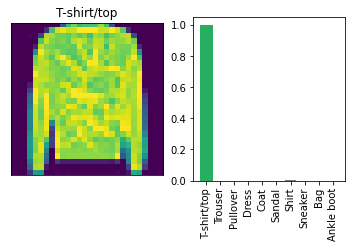

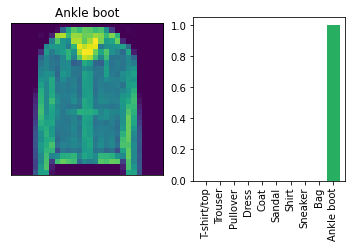

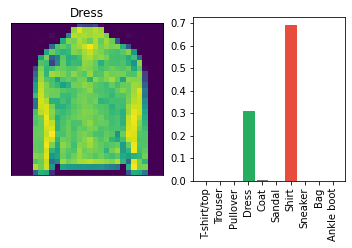

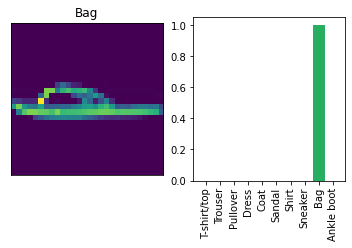

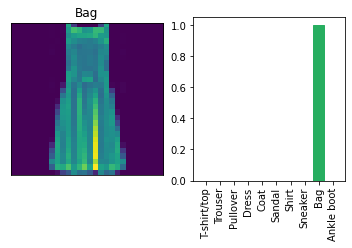

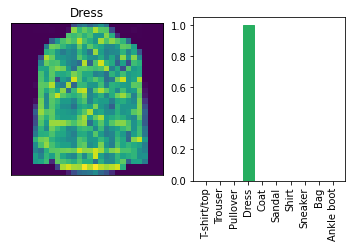

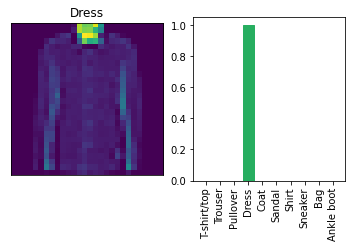

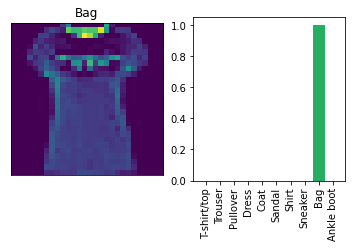

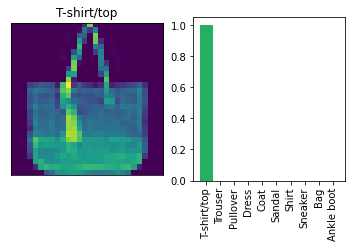

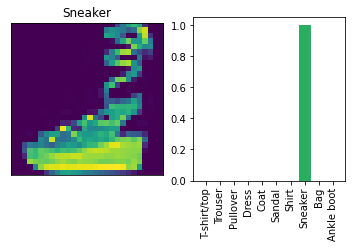

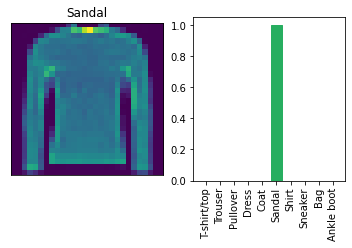

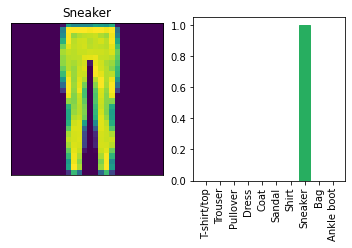

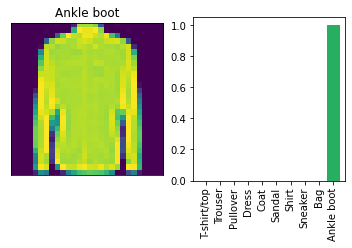

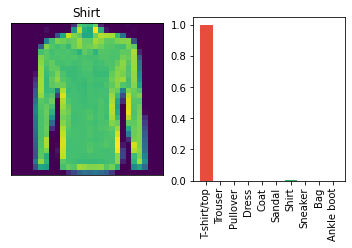

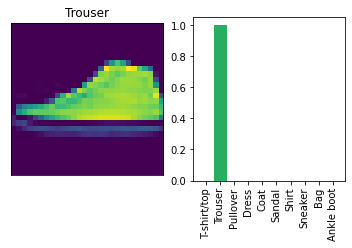

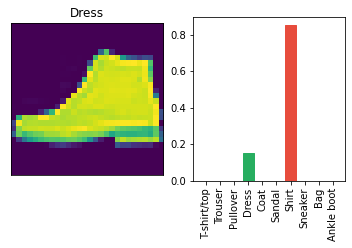

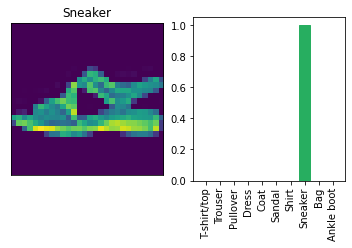

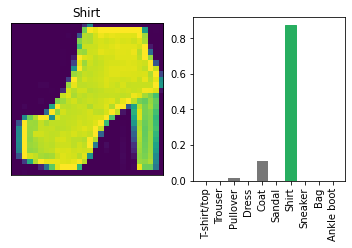

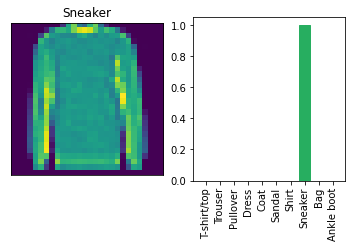

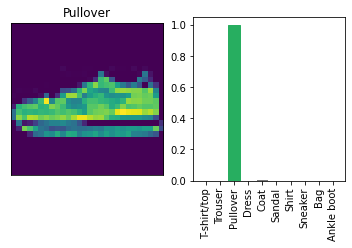

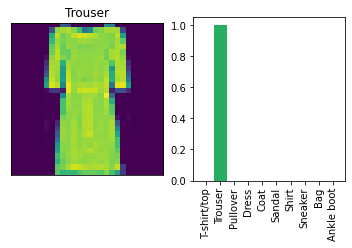

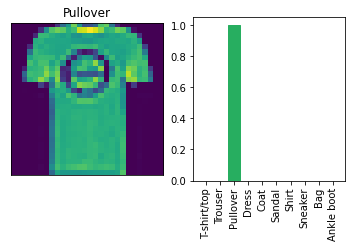

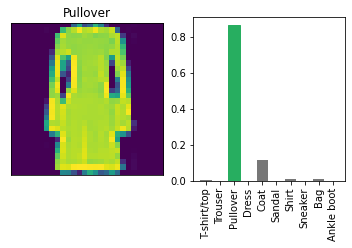

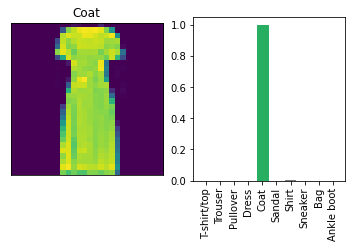

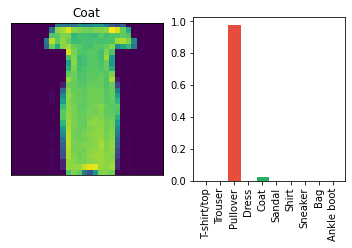

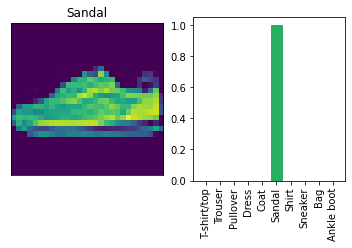

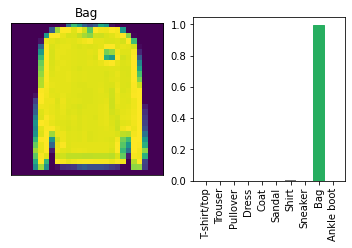

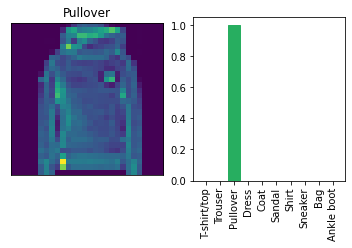

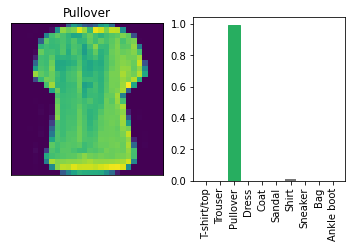

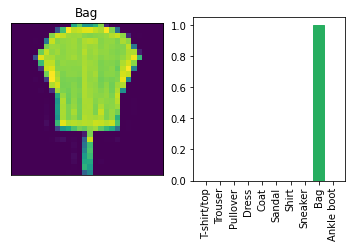

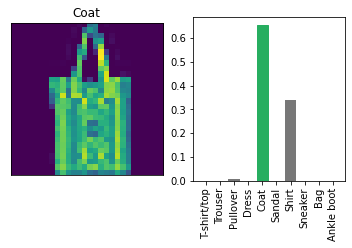

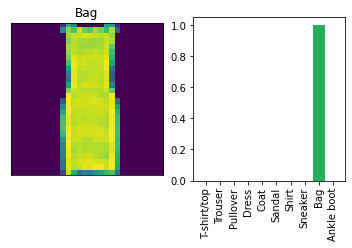

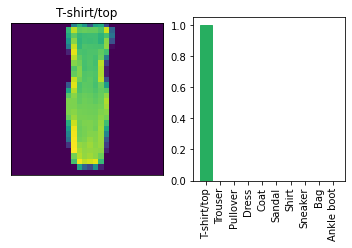

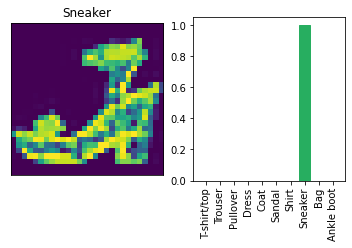

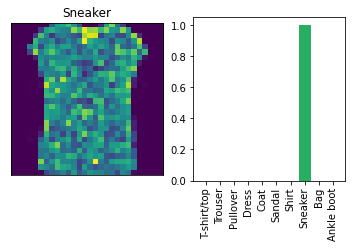

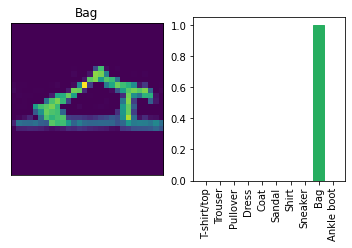

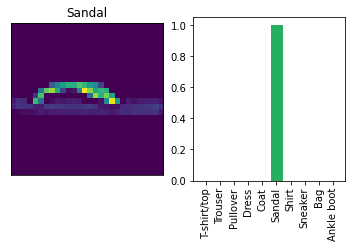

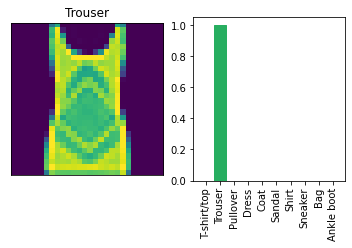

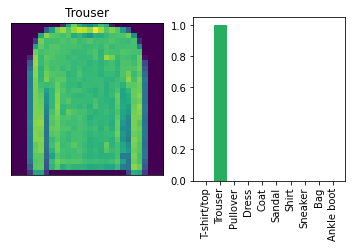

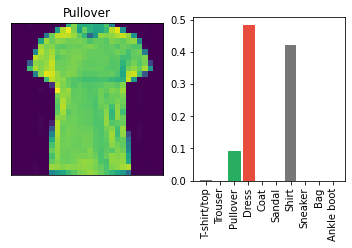

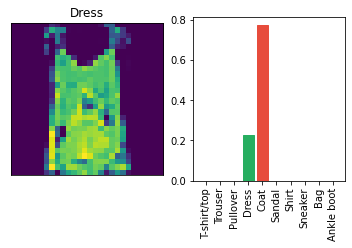

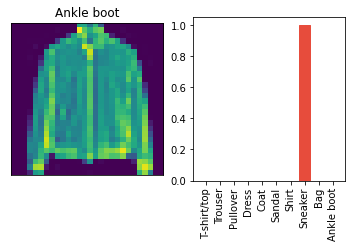

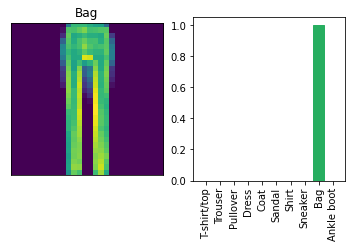

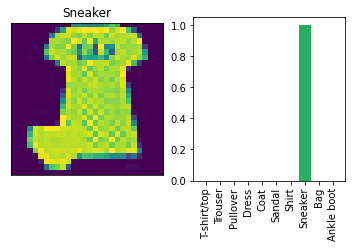

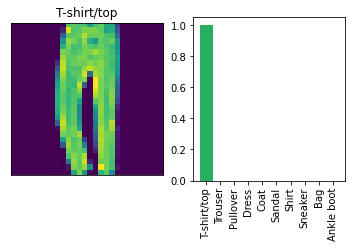

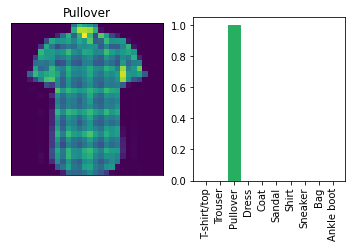

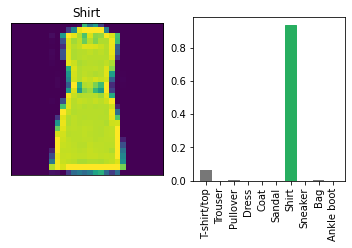

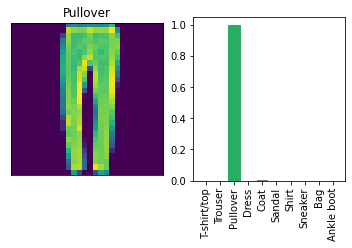

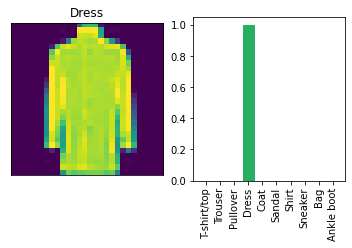

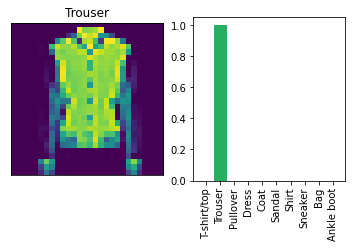

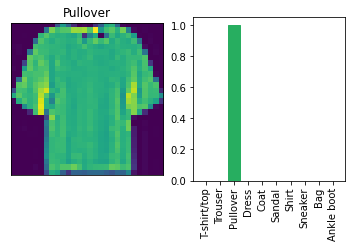

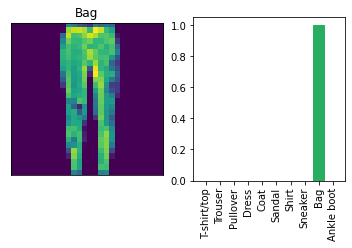

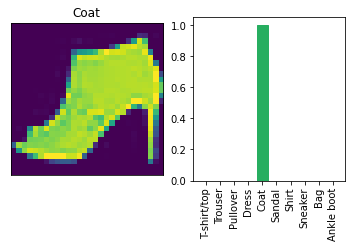

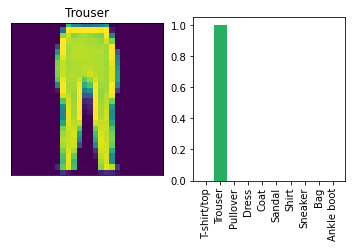

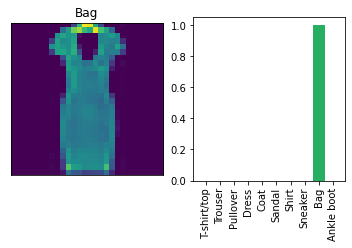

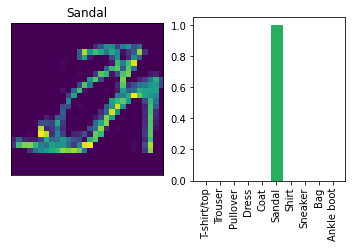

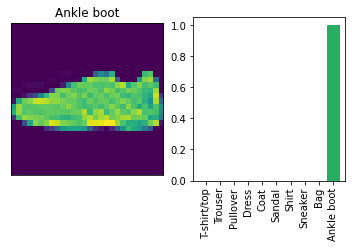

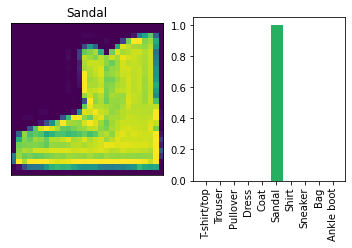

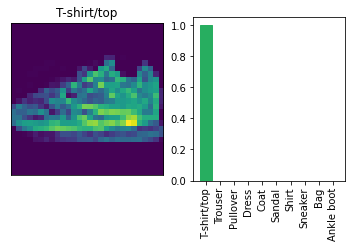

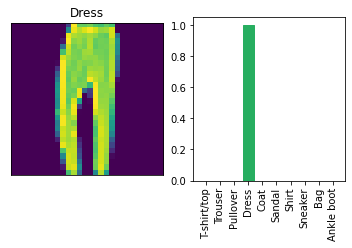

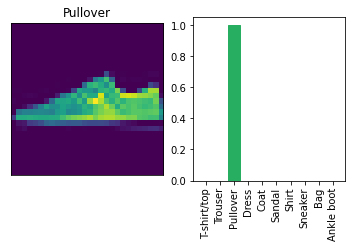

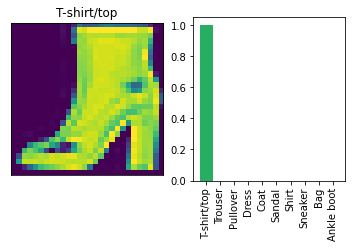

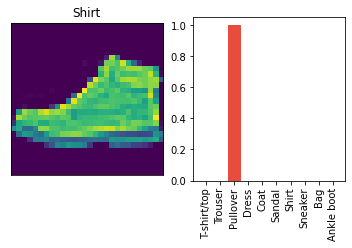

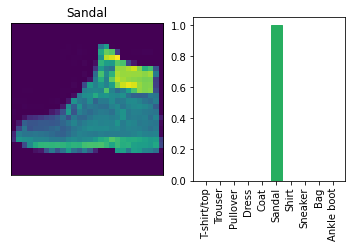

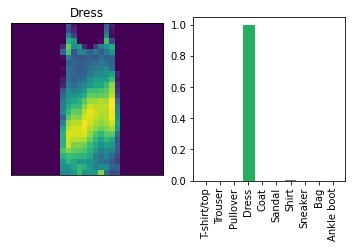

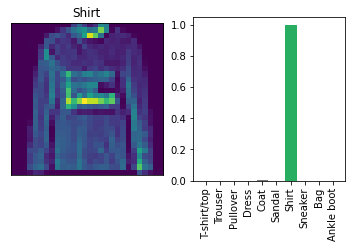

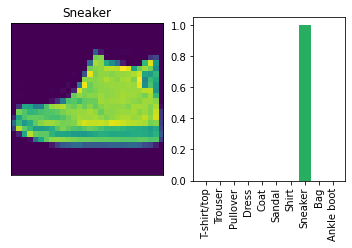

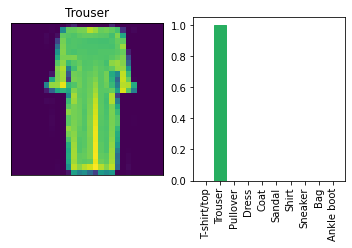

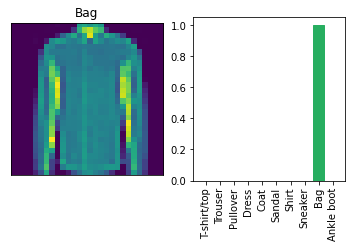

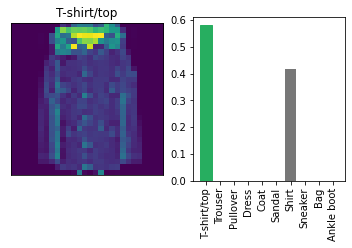

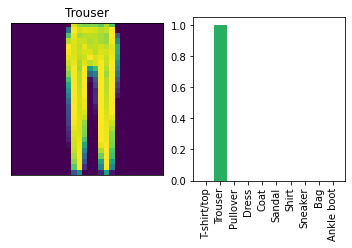

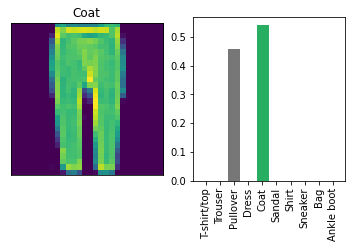

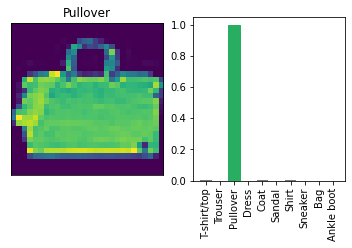

In [207]:
for i in range(100):
    check_predict(i, fig_size=(6,3))